In [47]:
import numpy as np
import statistics
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read in the CSV file.
aging_data_filepath = r'C:/Users/Davis/Desktop/savant/ev_aging.csv'
df = pd.read_csv(aging_data_filepath)

In [3]:
# Create new column combining the first name and last name columns and make it the index.
df["name"] = df[' first_name'] + ' ' + df['last_name']
full_data = df.drop([' first_name', 'last_name', 'Unnamed: 15'], axis=1)
full_data = full_data.set_index('name')

In [4]:
# Show the first five rows 
full_data.head()

,year,player_age,b_total_pa,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,hard_hit_percent,z_swing_percent,oz_swing_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent
name,,,,,,,,,,,,,
Albert Pujols,2019,39,545,88.3,12.4,6.0,36.3,59.7,30.8,46.2,26.7,16.9,10.2
Miguel Cabrera,2019,36,549,90.3,12.2,6.4,44.6,67.8,34.0,44.9,22.3,27.9,4.9
Jeff Mathis,2019,36,244,85.7,16.8,1.4,26.4,68.6,34.1,40.1,23.2,23.9,12.7
Shin-Soo Choo,2019,37,660,91.3,8.7,8.8,49.0,63.9,20.1,50.6,22.3,23.6,3.5
Rene Rivera,2019,36,20,87.6,19.2,0.0,23.1,66.7,20.0,46.2,46.2,7.7,0.0


In [5]:
# Drop the all ages that don't have at least 30 instances (ages used are 22-37)
full_data = full_data.query('player_age != [21, 38, 39, 40, 20, 43, 44, 42, 41, 45]')

In [6]:
# Create a dictionary and then loop through the dataset adding each player to the key that corresponds to their age.
ages_dict = {}
for i in range(22, 38):
    ages_dict[i] = full_data.query('player_age == @i')

In [37]:
ages_dict[22].join(ages_dict[23], lsuffix=('_'+str(22)), rsuffix=('_'+str(23)), how='inner').columns

Index(['year_22', 'player_age_22', 'b_total_pa_22', 'exit_velocity_avg_22',
       'launch_angle_avg_22', 'barrel_batted_rate_22', 'hard_hit_percent_22',
       'z_swing_percent_22', 'oz_swing_percent_22', 'groundballs_percent_22',
       'flyballs_percent_22', 'linedrives_percent_22', 'popups_percent_22',
       'year_23', 'player_age_23', 'b_total_pa_23', 'exit_velocity_avg_23',
       'launch_angle_avg_23', 'barrel_batted_rate_23', 'hard_hit_percent_23',
       'z_swing_percent_23', 'oz_swing_percent_23', 'groundballs_percent_23',
       'flyballs_percent_23', 'linedrives_percent_23', 'popups_percent_23'],
      dtype='object')

In [41]:
ev_diffs = {}
def calc_diff(age1, age2):
    """
    Takes in two ages and will calculate the ev difference for each player between those two ages and then weight the ev
    based on the minimum plate appearances from the two seasons. Lastly it will append the weighted value to a list
    contained in a dictionary with the key corresponding to the older of the two ages passed to the function.
    """
    # Join the df of the first and second age only for players that appear in both ages.
    ev_diffs[age2] = []
    comb_df = ages_dict[age1].join(ages_dict[age2], lsuffix=('_'+str(age1)), rsuffix=('_'+str(age2)), how='inner')
    
    # Calculate each players ev difference and weight it based on plate appearances.
    for row in comb_df.itertuples():
        diff = row[17] - row[4]
        weighted_diff = diff * min(row[3], row[16])
        ev_diffs[age2].append(weighted_diff)

In [44]:
# Loop through every age combination and calculate the ev difference.
for i in range(22, 37):
    calc_diff(i, i + 1)

In [49]:
# Calculate the mean weighted ev difference for each age group.
ev_means = {}
for key, value in ev_diffs.items():
    ev_means[key] = statistics.mean(value)

In [51]:
ev_means

{23: 34.75686274509819,
 24: 76.48053097345131,
 25: 8.665641025641191,
 26: 91.95489361702114,
 27: 42.09841269841282,
 28: 46.71306306306312,
 29: 46.852380952380756,
 30: 21.678142076502866,
 31: 12.466901408450891,
 32: -69.27372262773751,
 33: 66.48951612903247,
 34: -127.03809523809515,
 35: 77.10125000000005,
 36: -34.040816326530454,
 37: -71.18181818181807}

In [54]:
# Find the cumulative change for each age chronologically.
cumu_diff = {}
sum = 0
for key, value in ev_means.items():
    sum+= value
    cumu_diff[key]= sum

In [55]:
cumu_diff

{23: 34.75686274509819,
 24: 111.2373937185495,
 25: 119.90303474419069,
 26: 211.85792836121183,
 27: 253.95634105962466,
 28: 300.66940412268775,
 29: 347.5217850750685,
 30: 369.1999271515714,
 31: 381.6668285600223,
 32: 312.39310593228475,
 33: 378.8826220613172,
 34: 251.84452682322205,
 35: 328.9457768232221,
 36: 294.9049604966917,
 37: 223.7231423148736}

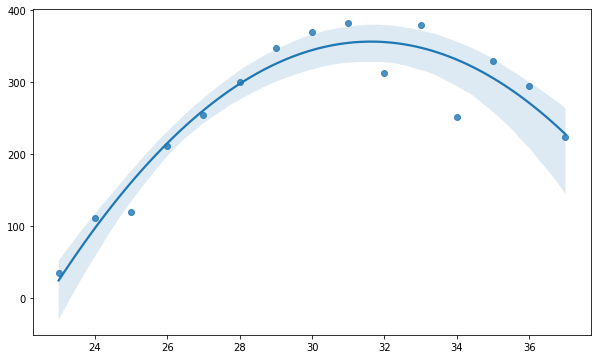

In [64]:
plt.pyplot.figure(figsize=(10, 6))
sns.regplot(x=list(cumu_diff.keys()), y=list(cumu_diff.values()), order=2)